In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print( iris.head() )

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [103]:
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels.unique()

tensor([0, 1, 2])

In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class myClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(4, 64)
        self.output = nn.Linear(64, 3)

    def forward(self, x):
        x = self.input(x)
        x = F.relu(x)
        x = self.output(x)  
        return x
        
ANNmodel = myClassModel()

In [97]:
lossFun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNmodel.parameters(),lr = 0.01)

In [99]:
numEpochs = 1000
losses = torch.zeros(numEpochs)

for epochi in range(numEpochs):
    yHat = ANNmodel(data)

    loss = lossFun(yHat,labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    

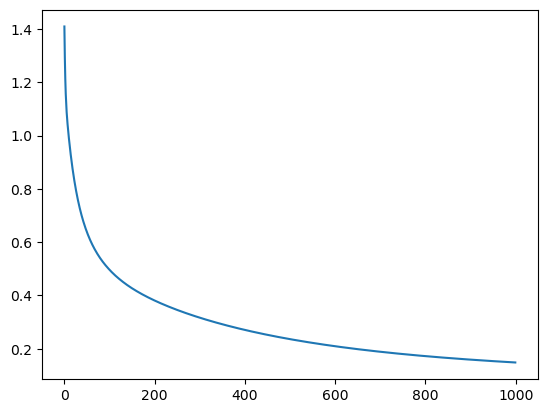

In [101]:
plt.plot(losses.detach())
plt.show()